#  Disciplinary Actions for Professional and Occupational Licensees

### Some visualizations to get out of this data set
* Most common fines
* Who recieved the most disciplinary actions
* Which license type has the most fines

### Necessary data  set(s)
[Disciplinary Actions for Professional and Occupational Licensees](https://data.delaware.gov/Licenses-and-Certifications/Disciplinary-Actions-for-Professional-and-Occupati/dz6p-akeq)




*Written on January 24, 2018 by Seye Adekanye*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib notebook

In [2]:
url = "https://data.delaware.gov/resource/wqvn-hw3m.csv"
data = pd.read_csv(url)

 After reading in the `csv` file, the `.head(n)`method is a great way to take a look at the first `n` rows. This helps determine if your data looks like what you are expecting.

In [4]:
data.head()

,combined_name,count,disp_end,disp_start,first_name,item_text,last_name,license_id_l,license_type,profession_id
0,"Jones, Matthew T.",1,NaN,2017-06-13T00:00:00.000,Matthew,Remedial Education,Jones,N1-0002718,Veterinarian,Veterinary Medicine
1,"Jones, Matthew T.",1,NaN,2017-06-13T00:00:00.000,Matthew,Probation,Jones,N1-0002718,Veterinarian,Veterinary Medicine
2,"Fortner, Elizabeth Buckley",1,NaN,2011-06-03T00:00:00.000,Elizabeth,Letter of Reprimand,Fortner,G2-0002068,Dental Hygienist,Dentistry
3,"Hynson, Lauren Marie",1,2017-07-14T00:00:00.000,2017-04-12T00:00:00.000,Lauren,Remedial Education,Hynson,L1-0041565,Registered Nurse,Nursing
4,"Hensley, Leslie A Doughty",1,2017-07-16T00:00:00.000,2013-07-16T00:00:00.000,Leslie,Probation,Hensley,L6-0A00209,Certified Registered Nurse Anesthetist,Nursing


Doing this proves to be a good idea in this case. Based on the [description of the data](https://data.delaware.gov/Licenses-and-Certifications/Disciplinary-Actions-for-Professional-and-Occupati/dz6p-akeq), we expect a **disciplinary_actions** column. However we see no such column in our `data`. For some reason, the column is named **item_text**. 

We can actually just get the names of the columns of our data using the `.columns` attribute

In [5]:
data.columns

Index(['combined_name', 'count', 'disp_end', 'disp_start', 'first_name',
       'item_text', 'last_name', 'license_id_l', 'license_type',
       'profession_id'],
      dtype='object')

We can work with our data as is, but it might be better to change the column name **item-text** to something more descriptive, perhaps **disciplinary_action**. This can be done with the `pandas` `rename()` method. Note that the data frame manipulation is done in place by setting the keyword argument `inplace=True`. This way a new dataframe need not be created.  

In [6]:
data.rename(index=str, columns={"item_text": "disciplinary_action"}, inplace=True)

In [7]:
data.head()

,combined_name,count,disp_end,disp_start,first_name,disciplinary_action,last_name,license_id_l,license_type,profession_id
0,"Jones, Matthew T.",1,NaN,2017-06-13T00:00:00.000,Matthew,Remedial Education,Jones,N1-0002718,Veterinarian,Veterinary Medicine
1,"Jones, Matthew T.",1,NaN,2017-06-13T00:00:00.000,Matthew,Probation,Jones,N1-0002718,Veterinarian,Veterinary Medicine
2,"Fortner, Elizabeth Buckley",1,NaN,2011-06-03T00:00:00.000,Elizabeth,Letter of Reprimand,Fortner,G2-0002068,Dental Hygienist,Dentistry
3,"Hynson, Lauren Marie",1,2017-07-14T00:00:00.000,2017-04-12T00:00:00.000,Lauren,Remedial Education,Hynson,L1-0041565,Registered Nurse,Nursing
4,"Hensley, Leslie A Doughty",1,2017-07-16T00:00:00.000,2013-07-16T00:00:00.000,Leslie,Probation,Hensley,L6-0A00209,Certified Registered Nurse Anesthetist,Nursing


Unfortunately we have another problem. Based on the [description of the data](https://data.delaware.gov/Licenses-and-Certifications/Disciplinary-Actions-for-Professional-and-Occupati/dz6p-akeq), the data contains 5075 rows, however if when check the dimensions of our data set using the `len()` method on `data`, we get a different number. 

In [8]:
len(data)

1000

So we only have 1000 rows, which is less than ideal. Luckily we have other ways to get the data. For the rest of this Notebook, we will download the `csv` file to our local machine and work with that file. It will be named data2 (Could not think of something better...).

In [3]:
file = "/Users/Adekanye/Downloads/Disciplinary_Actions_for_Professional_and_Occupational_Licensees.csv"
data2 = pd.read_csv(file)

In [10]:
data2.head()

,Last Name,First Name,Combined Name,License_no,Profession ID,License Type,disciplinary_action,disp_start,disp_end,Count
0,Bristow,Kimberly,"Bristow, Kimberly R",I3-0001241,Optometry,Therapeutic Optometrist,Probation,09/14/2006,02/15/2007,1
1,Meloro,Kirstin,"Meloro, Kirstin A. Nickle",L1-0025243,Nursing,Registered Nurse,Suspension,08/07/2013,NaN,1
2,Bradford,William,"Bradford, William J.",T1-0004621,Electrical Examiners,Master Electrician,Refer to Disciplinary Order,10/13/2009,NaN,1
3,White,Lateasa,"White, Lateasa L.",M1-E007103,Cosmetology and Barbering,Cosmetologist,Probation,11/30/2015,NaN,1
4,Carden,Preston,"Carden, Preston S., Jr.",T1-0004541,Electrical Examiners,Master Electrician,Fine,11/04/2015,12/14/2015,1


In [11]:
len(data2)

5075

<IPython.core.display.Javascript object>


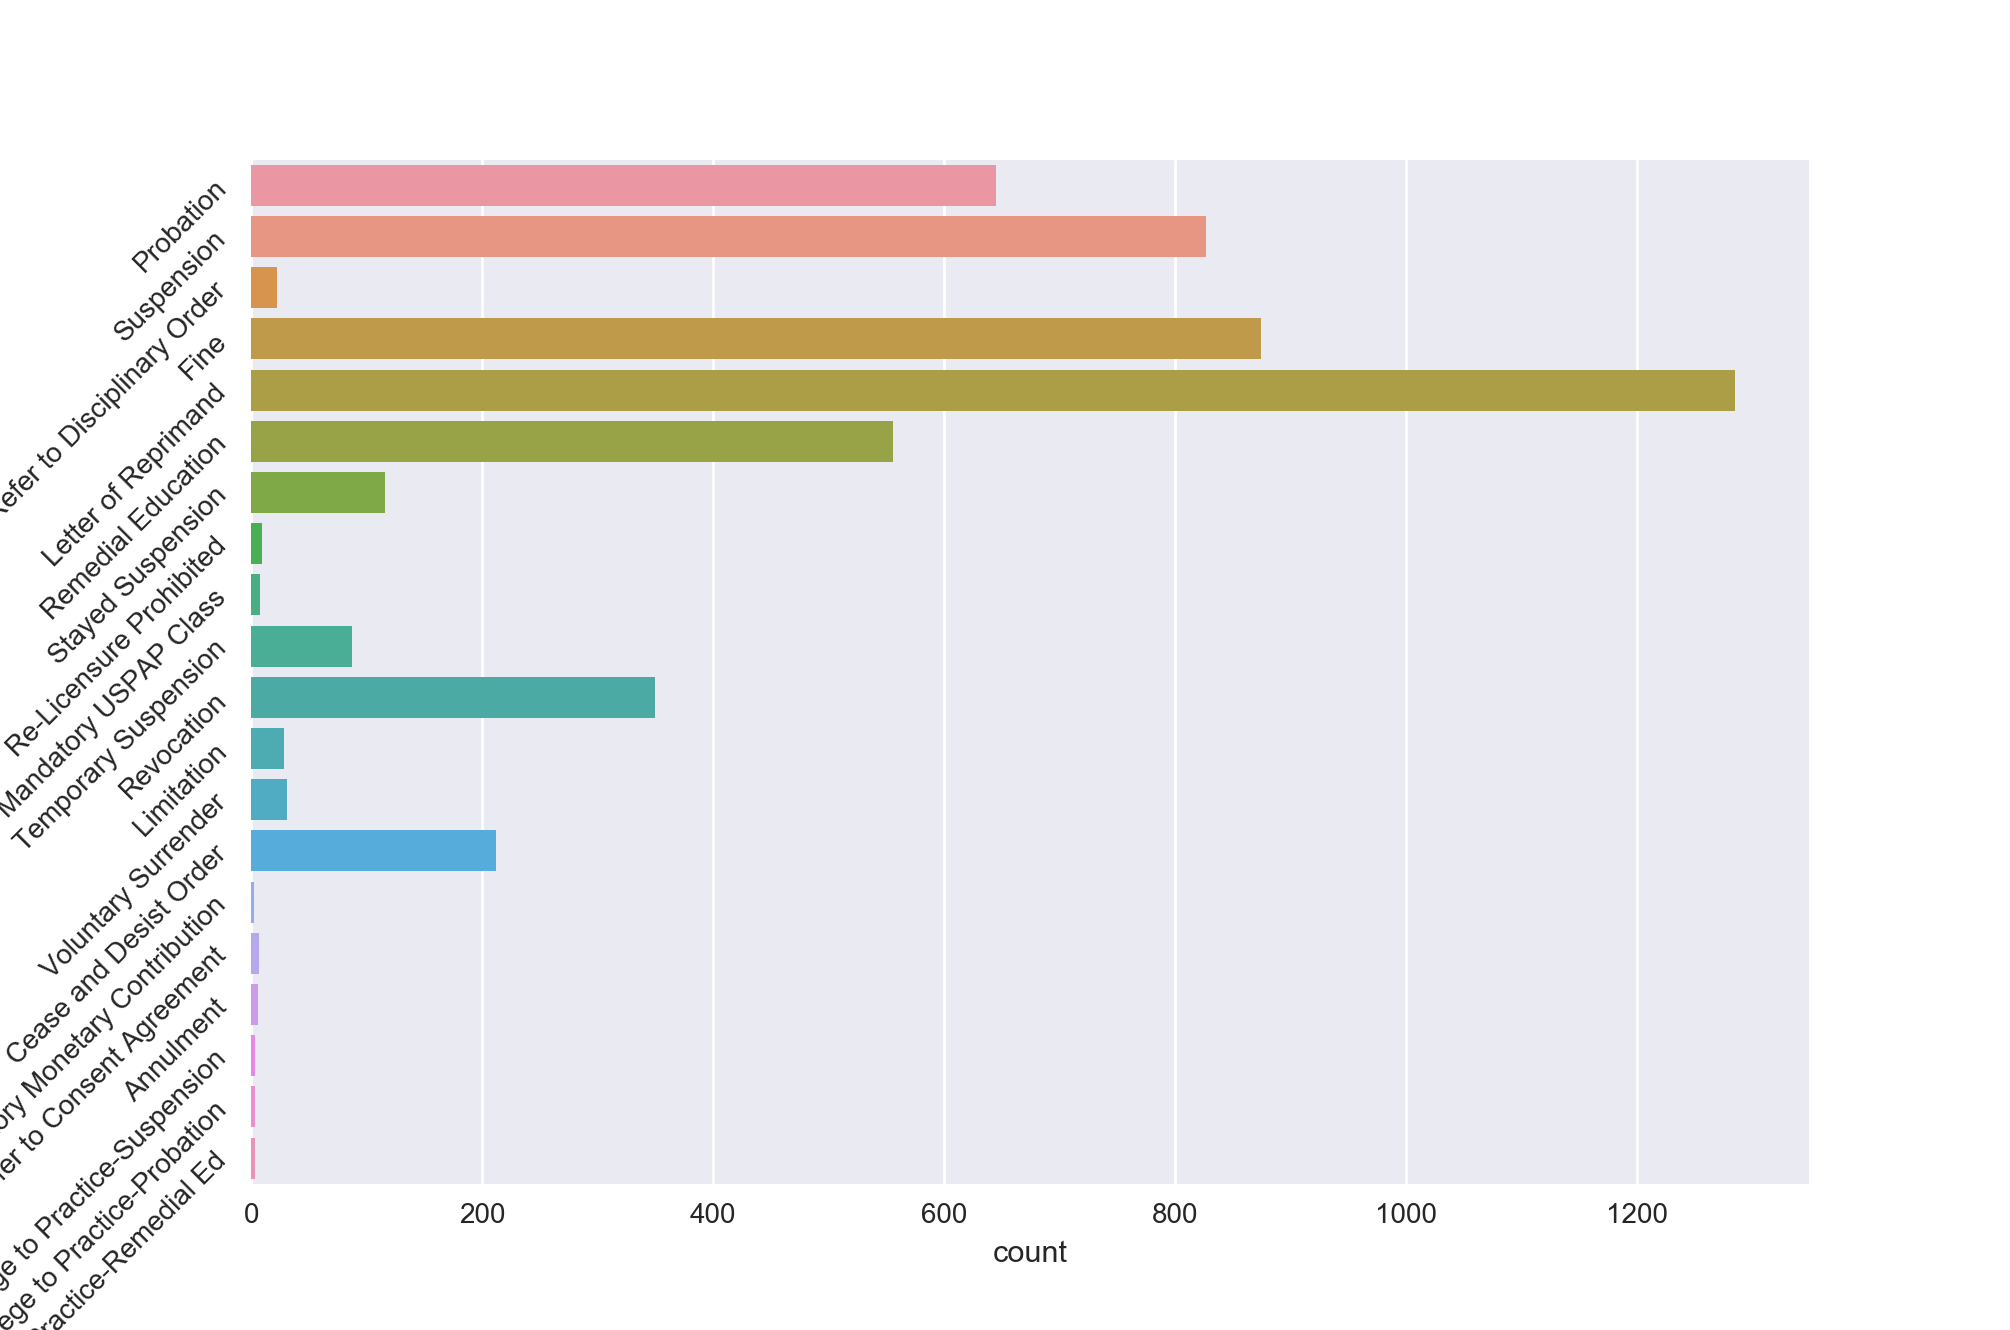

In [36]:
p = sns.countplot(y=data2["disciplinary_action"], data=data2)
p.set_yticklabels(labels=data2['disciplinary_action'].unique(),rotation=45);

The barplot above answers our first question. It tells us that the most common fine is *Letter of Reprimand* (for this data set). So out of 5075 fines, more than 1200 were letters of reprimand. *More than 1200* might not be good enough for some, so let's get an exact count.

This can be done in many ways. We will do it in what we believe is the most Pythonic way, which is by using the `Counter` [subclass](https://docs.python.org/2/library/collections.html)

In [37]:
from collections import Counter
fine_counter = Counter()
for fine in data2['disciplinary_action']:
    fine_counter[fine] += 1

A less pythonic way would look soemthing like this (This is actually the first way we did it):
```python
count = []
action_list = []
for action in df3['disciplinary_action'].unique():
    action_list.append(action)
    count.append(len(grouped.get_group(action)))
data = dict(zip(action_list,count))
```

Anyway back to our `fine_counter`, which is now a `dict` object with the fines and their exact number of occurences. This is convinient because the `Counter` subclass as a `most_common(n)` method which will give the `n` most common occorences.

In [38]:
fine_counter.most_common(1)

[('Letter of Reprimand', 1285)]

So now we can say that out of 5075 fines, 1285 of them were letters of reprimand.

Now, on to the question of *Who recieved the most disciplinary actions?*. A subquestion to that could be *What Licence Type recieved the most disciplinary actions?*. We will try and answer both questions next.

The `Counter` subclass will be very useful here again.  

In [39]:
name_counter = Counter()
for name in data2['Combined Name']:
    name_counter[name] += 1

Let us see the top 10 number of fines recieved by calling the `most_common()` method again.

In [40]:
name_counter.most_common(10)

[('Dollard, Aijarkyn Z.', 10),
 ('Titus, Patrick A', 9),
 ('Baker, Yvette K.', 8),
 ('Louie, Michael D.', 7),
 ('Sweeney, Carolyn E. Richie', 7),
 ('Estep, Ralph V.', 7),
 ('Aldridge, Anne C.', 7),
 ('Patterson, Sandra', 7),
 ('Hensley, Leslie A Doughty', 7),
 ('Bernal, Guillermo M', 7)]

It looks like Mr./Mrs. Dollard is in 1st place with 10 'fines'. It would be interesting to see what these 'fines atually are.

For this we will use the `pandas` [.loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) indexer.

In [41]:
most_common_name1, _ = name_counter.most_common(1)[0]
data2.loc[data2['Combined Name'] == most_common_name1]

,Last Name,First Name,Combined Name,License_no,Profession ID,License Type,disciplinary_action,disp_start,disp_end,Count
1300,Dollard,Aijarkyn,"Dollard, Aijarkyn Z.",M2-T001322,Cosmetology and Barbering,Nail Technician Temporary Permit,Fine,04/16/2012,NaN,1
1507,Dollard,Aijarkyn,"Dollard, Aijarkyn Z.",M7-M0002566,Cosmetology and Barbering,Nail Technician Apprentice,Cease and Desist Order,04/16/2012,NaN,1
1765,Dollard,Aijarkyn,"Dollard, Aijarkyn Z.",M2-T000516,Cosmetology and Barbering,Nail Technician Temporary Permit,Fine,04/16/2012,NaN,1
1917,Dollard,Aijarkyn,"Dollard, Aijarkyn Z.",M7-M0002566,Cosmetology and Barbering,Nail Technician Apprentice,Fine,04/16/2012,NaN,1
1990,Dollard,Aijarkyn,"Dollard, Aijarkyn Z.",M2-T000516,Cosmetology and Barbering,Nail Technician Temporary Permit,Cease and Desist Order,04/16/2012,NaN,1
1993,Dollard,Aijarkyn,"Dollard, Aijarkyn Z.",M7-M0001829,Cosmetology and Barbering,Nail Technician Apprentice,Fine,04/16/2012,NaN,1
2196,Dollard,Aijarkyn,"Dollard, Aijarkyn Z.",M7-M0002651,Cosmetology and Barbering,Nail Technician Apprentice,Cease and Desist Order,04/16/2012,NaN,1
2308,Dollard,Aijarkyn,"Dollard, Aijarkyn Z.",M7-M0002651,Cosmetology and Barbering,Nail Technician Apprentice,Fine,04/16/2012,NaN,1
3109,Dollard,Aijarkyn,"Dollard, Aijarkyn Z.",M7-M0001829,Cosmetology and Barbering,Nail Technician Apprentice,Cease and Desist Order,04/16/2012,NaN,1
4297,Dollard,Aijarkyn,"Dollard, Aijarkyn Z.",M2-T001322,Cosmetology and Barbering,Nail Technician Temporary Permit,Cease and Desist Order,04/16/2012,NaN,1


So we see form the **disp_start** column that all 10 fines for Mr./Mrs. Dollard were given on the same day. This seems very strange, but is also very uninteresting. Lets see if this is the case for the second most recipient of fines.

In [42]:
most_common_name2, _ = name_counter.most_common(2)[1]
data2.loc[data2['Combined Name'] == most_common_name2]

,Last Name,First Name,Combined Name,License_no,Profession ID,License Type,disciplinary_action,disp_start,disp_end,Count
1532,Titus,Patrick,"Titus, Patrick A",MD3949,Controlled Substances,Physician CSR,Revocation,02/29/2016,NaN,1
2251,Titus,Patrick,"Titus, Patrick A",C1-0006175,Medical Practice,Physician M.D.,Probation,01/07/2014,NaN,1
2592,Titus,Patrick,"Titus, Patrick A",MD3949,Controlled Substances,Physician CSR,Remedial Education,04/16/2012,NaN,1
2659,Titus,Patrick,"Titus, Patrick A",MD3949,Controlled Substances,Physician CSR,Suspension,12/09/2011,05/23/2012,1
2869,Titus,Patrick,"Titus, Patrick A",C1-0006175,Medical Practice,Physician M.D.,Fine,01/07/2014,02/07/2014,1
3387,Titus,Patrick,"Titus, Patrick A",MD3949,Controlled Substances,Physician CSR,Remedial Education,11/05/2014,NaN,1
3780,Titus,Patrick,"Titus, Patrick A",C1-0006175,Medical Practice,Physician M.D.,Remedial Education,01/07/2014,NaN,1
3842,Titus,Patrick,"Titus, Patrick A",MD3949,Controlled Substances,Physician CSR,Suspension,11/05/2014,NaN,1
4628,Titus,Patrick,"Titus, Patrick A",C1-0006175,Medical Practice,Physician M.D.,Revocation,02/02/2016,NaN,1


Now this is a bit more interesting. Mr. Titus has fines on dates ranging from the year 2012 to 2016.

Although this was not one of the initial visualizations planned for this data set, it might be interesting to see the frequency in the number of fines per year.

We will turn our focus to the **disp_start** column for this. It will be nice if the entiries in the **disp_start** coloumn are `datetime` objects, but we suspect they are just strings. Let us confirm this using the `type` method.

In [52]:
[type(date) for date in data2['disp_start']][0:10]

[str, str, str, str, str, str, str, str, str, str]

Most of the dates are strings, but there are a few that are of type `float`. This might not be an issue, but before we convert the **disp_start** column to `datetime`, we will first convert everthing to `string` using `str()`.

In [44]:
from datetime import datetime
disciplinary_start_date = []
for date in data2['disp_start']:
    try:
        disciplinary_start_date.append(datetime.strptime(str(date),'%m/%d/%Y'))
    except:
        disciplinary_start_date.append(date)
    
    

The reason for the try/except in the for loop is due to the fact that a couple of dates are missing. How many dates exactly are missing? running this code:
```python
data2['disp_start'].isnull().sum()
```
tells us the are 23 missing dates. since this is just 23 missing dates out of 5075 observations, We think we can still get a good representation of number of fines per year. 

In [45]:
year_counter = Counter()
for year in disciplinary_start_date:
    try:
        year_counter[year.year] += 1
    except:
        pass

In [46]:
disp_year_pd = pd.DataFrame.from_dict(year_counter, orient='index').sort_index() # for pandas plot
disp_year_sns = pd.DataFrame.from_dict(year_counter, orient='index').reset_index() # for seaborn plot
disp_year_sns.sort_values('index', inplace=True)

<IPython.core.display.Javascript object>


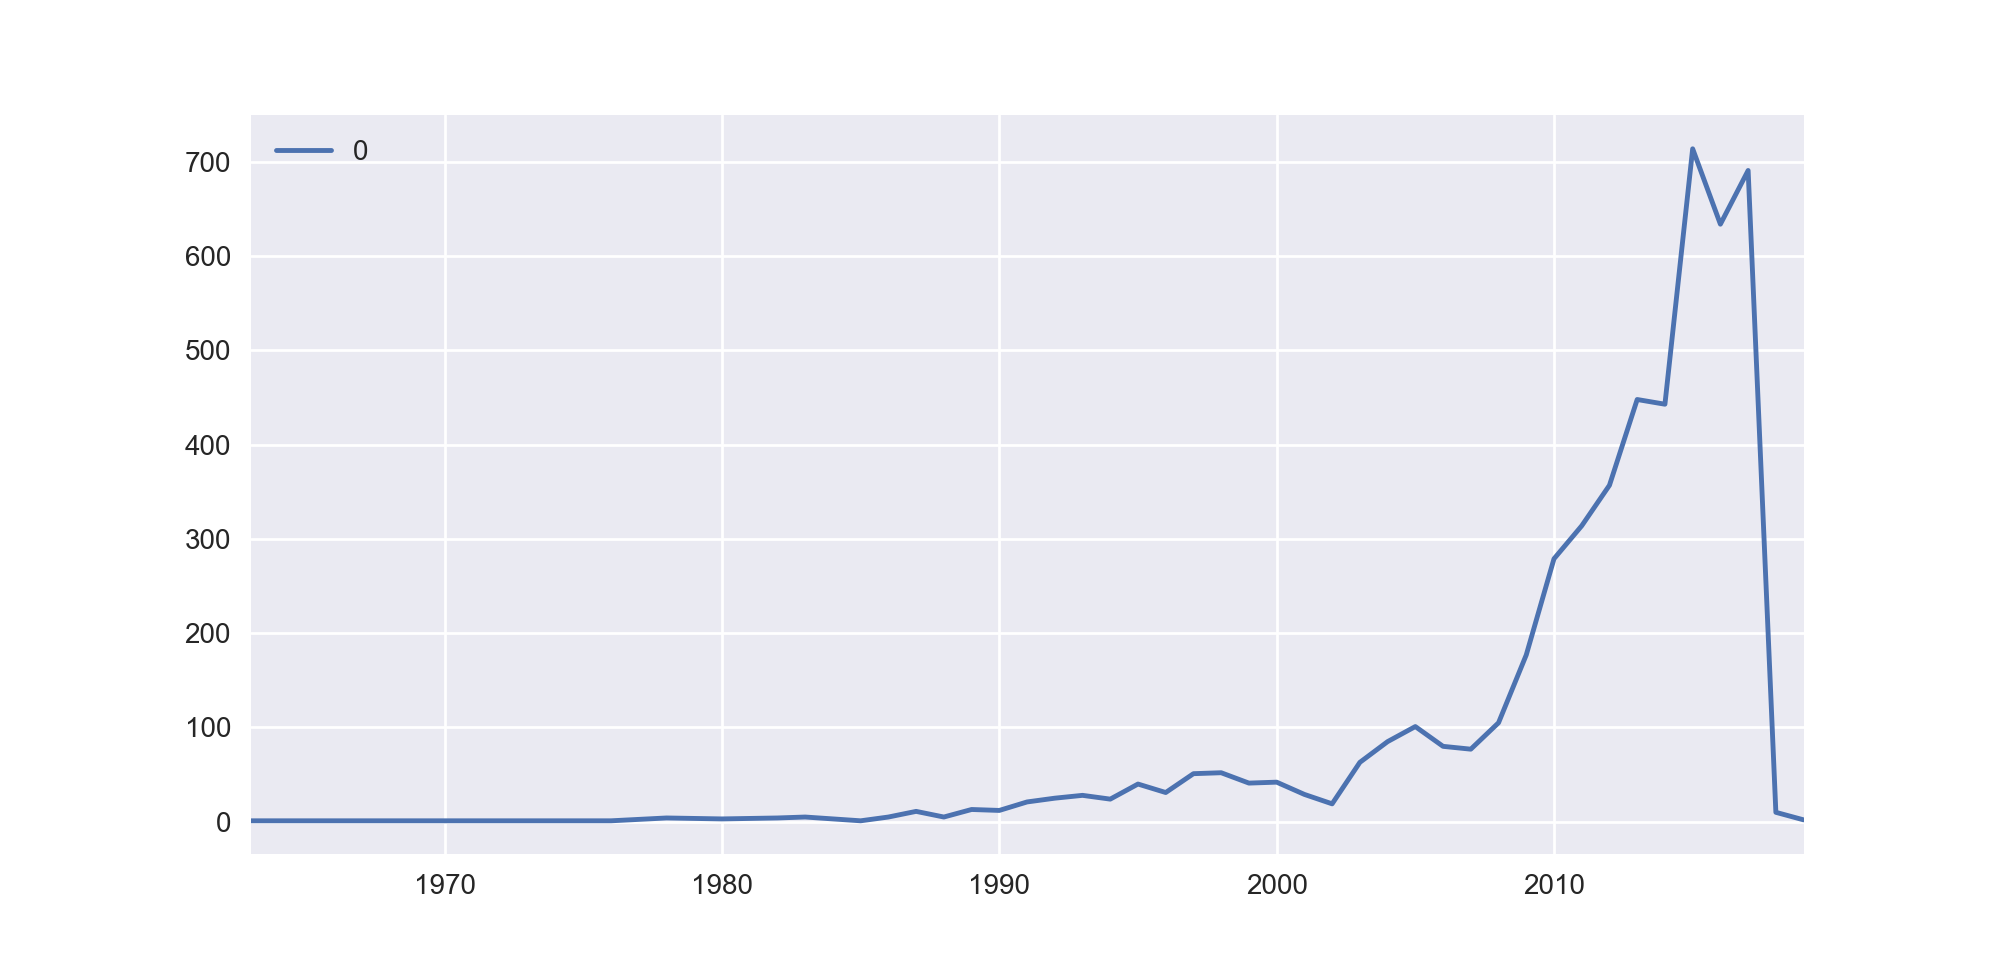

In [47]:
disp_year_pd.plot()

In [48]:
disp_year_sns.columns = ['Year','Number of Fines']

<IPython.core.display.Javascript object>


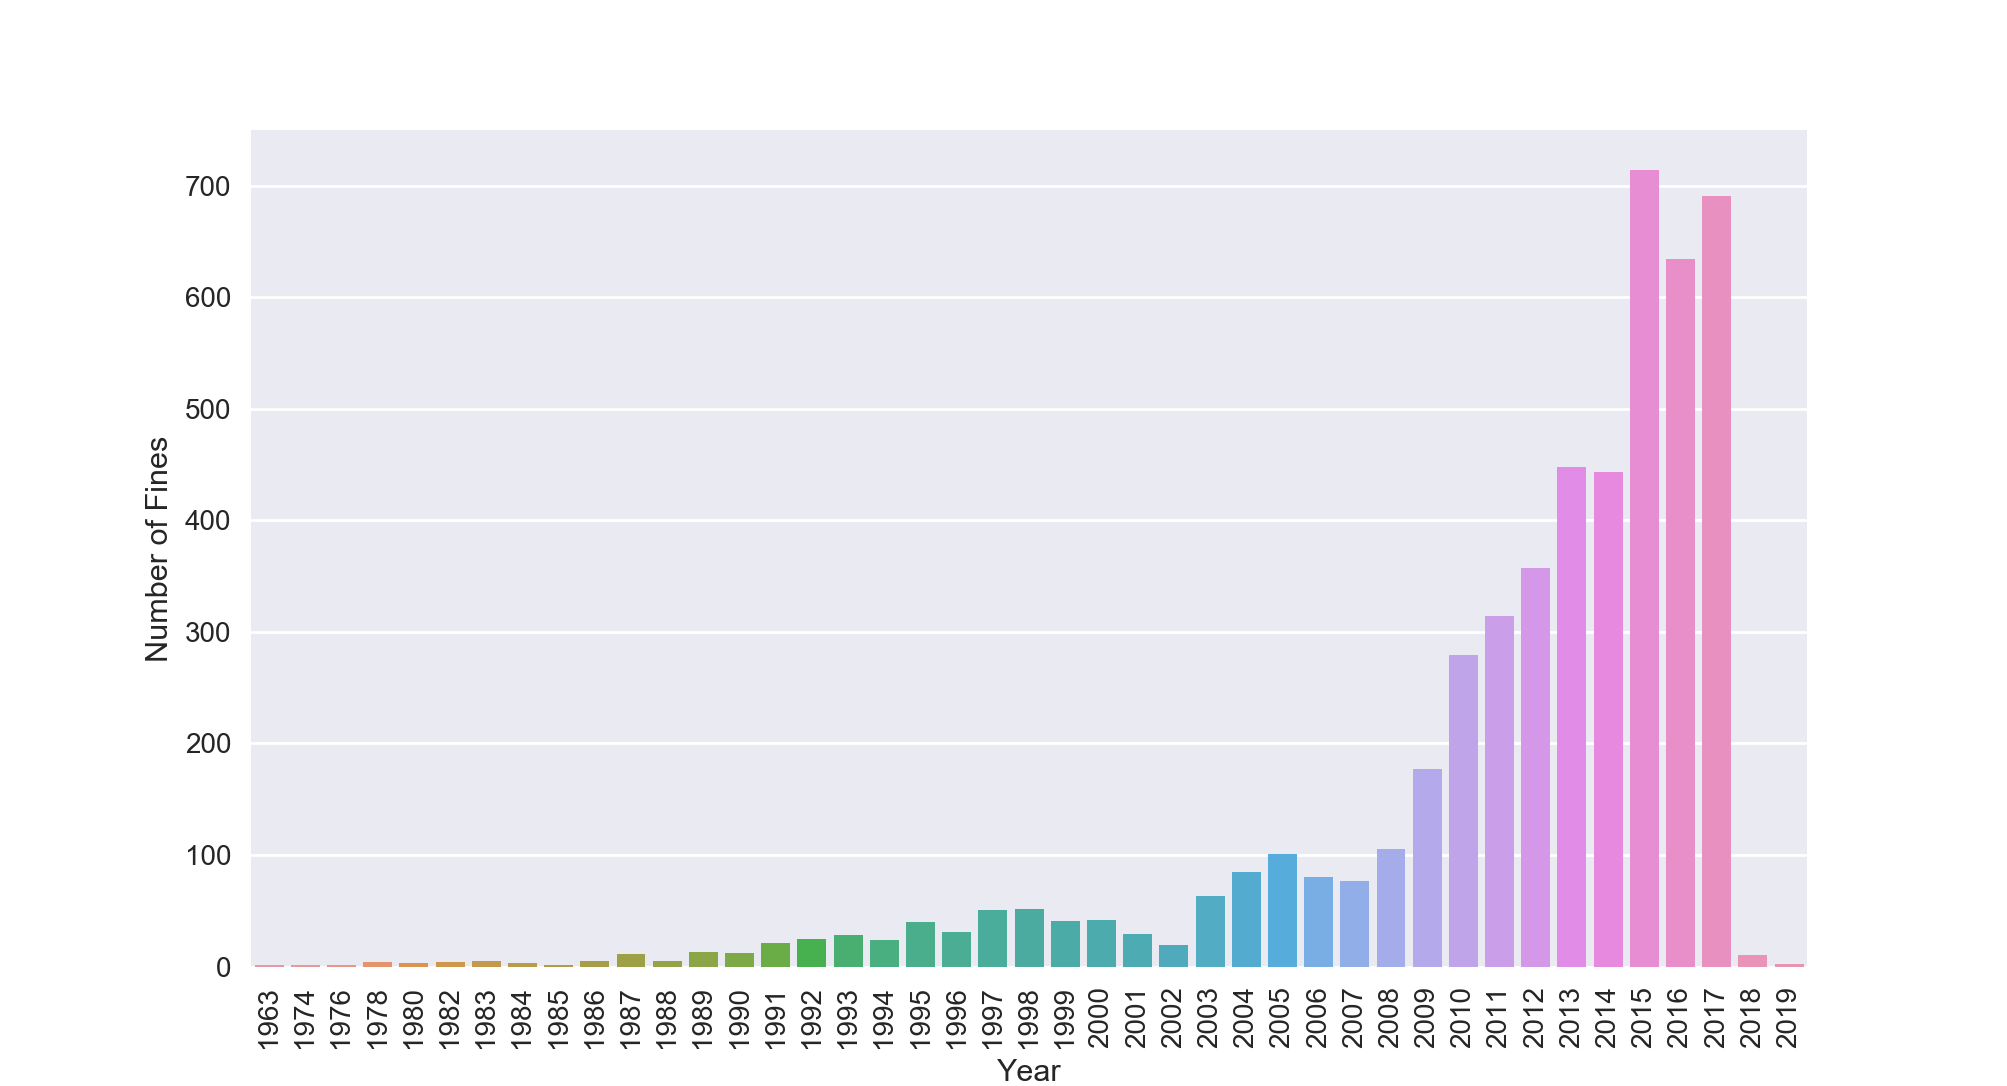

In [49]:
s = sns.barplot(x=disp_year_sns['Year'],y=disp_year_sns['Number of Fines'])
s.set_xticklabels(labels=disp_year_sns['Year'],rotation=90);

#### Some insight/questions we can take away from the 'Number of Fines Per Year'  plots above:
* Between there years 2009 and 2015, the number of fines increased siginificantly. What factors could have caused that?
* There are some fines starting in 2019 (This analysis is being conducted in Jan 2018). Are there fines given that do not start immmediately or is this bad data?
----------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------

Finally we try to answer the last question, **Which license type has the most fines?**

Taking a look at the number of unique entries in the **License Type** column of `data2` using the `len()` and `.unique()` methods, we see that there are 115 unique license types in our data.

It might be 'better' to answer the folowing question instead:
**Which profession has the most fines?**
since the **Profession ID** column only has 35 unique entries.


In [8]:
len(data2['License Type'].unique())

115

In [13]:
len(data2['Profession ID'].unique())

35

In [14]:
data2.head(2)

,Last Name,First Name,Combined Name,License_no,Profession ID,License Type,disciplinary_action,disp_start,disp_end,Count
0,Bristow,Kimberly,"Bristow, Kimberly R",I3-0001241,Optometry,Therapeutic Optometrist,Probation,09/14/2006,02/15/2007,1
1,Meloro,Kirstin,"Meloro, Kirstin A. Nickle",L1-0025243,Nursing,Registered Nurse,Suspension,08/07/2013,NaN,1


In [15]:
grouped = data2.groupby('Profession ID')

In [16]:
data2['Profession ID'].unique()

array(['Optometry', 'Nursing', 'Electrical Examiners',
       'Cosmetology and Barbering', 'Architecture',
       'Real Estate Appraisers', 'Pharmacy', 'Medical Practice',
       'Geologists', 'Real Estate', 'Land Surveyors', 'Accountancy',
       'Dentistry', 'Psychology', 'Physical Therapy/Athletic Trg',
       'Mental Health', 'Veterinary Medicine', 'Plumbing/HVACR',
       'Funeral Services', 'Occupational Therapy', 'Chiropractic',
       'Speech and Hearing', 'Pilots', 'Social Work Examiners', 'Podiatry',
       'Massage Bodywork', 'Nursing Home Administrators',
       'Landscape Architecture', 'Deadly Weapons Dealers',
       'Controlled Substances', 'Home Inspectors', 'Charitable Gaming',
       'Manufactured Home Installation', 'Adult Entertainment',
       'Combative Sports'], dtype=object)

In [21]:
profession_dict = {}
for profession in data2['Profession ID'].unique():
    profession_dict[profession] = len(grouped.get_group(profession))

In [22]:
profession_dict

{'Accountancy': 195,
 'Adult Entertainment': 1,
 'Architecture': 301,
 'Charitable Gaming': 12,
 'Chiropractic': 40,
 'Combative Sports': 4,
 'Controlled Substances': 75,
 'Cosmetology and Barbering': 389,
 'Deadly Weapons Dealers': 1,
 'Dentistry': 62,
 'Electrical Examiners': 289,
 'Funeral Services': 24,
 'Geologists': 12,
 'Home Inspectors': 5,
 'Land Surveyors': 75,
 'Landscape Architecture': 6,
 'Manufactured Home Installation': 8,
 'Massage Bodywork': 325,
 'Medical Practice': 597,
 'Mental Health': 63,
 'Nursing': 1369,
 'Nursing Home Administrators': 18,
 'Occupational Therapy': 94,
 'Optometry': 15,
 'Pharmacy': 194,
 'Physical Therapy/Athletic Trg': 59,
 'Pilots': 12,
 'Plumbing/HVACR': 27,
 'Podiatry': 11,
 'Psychology': 38,
 'Real Estate': 486,
 'Real Estate Appraisers': 138,
 'Social Work Examiners': 48,
 'Speech and Hearing': 41,
 'Veterinary Medicine': 41}

In [30]:
Profession_df = pd.DataFrame.from_dict(profession_dict, orient='index').reset_index()

In [32]:
Profession_df.columns = ['Profession', 'Count']

<IPython.core.display.Javascript object>


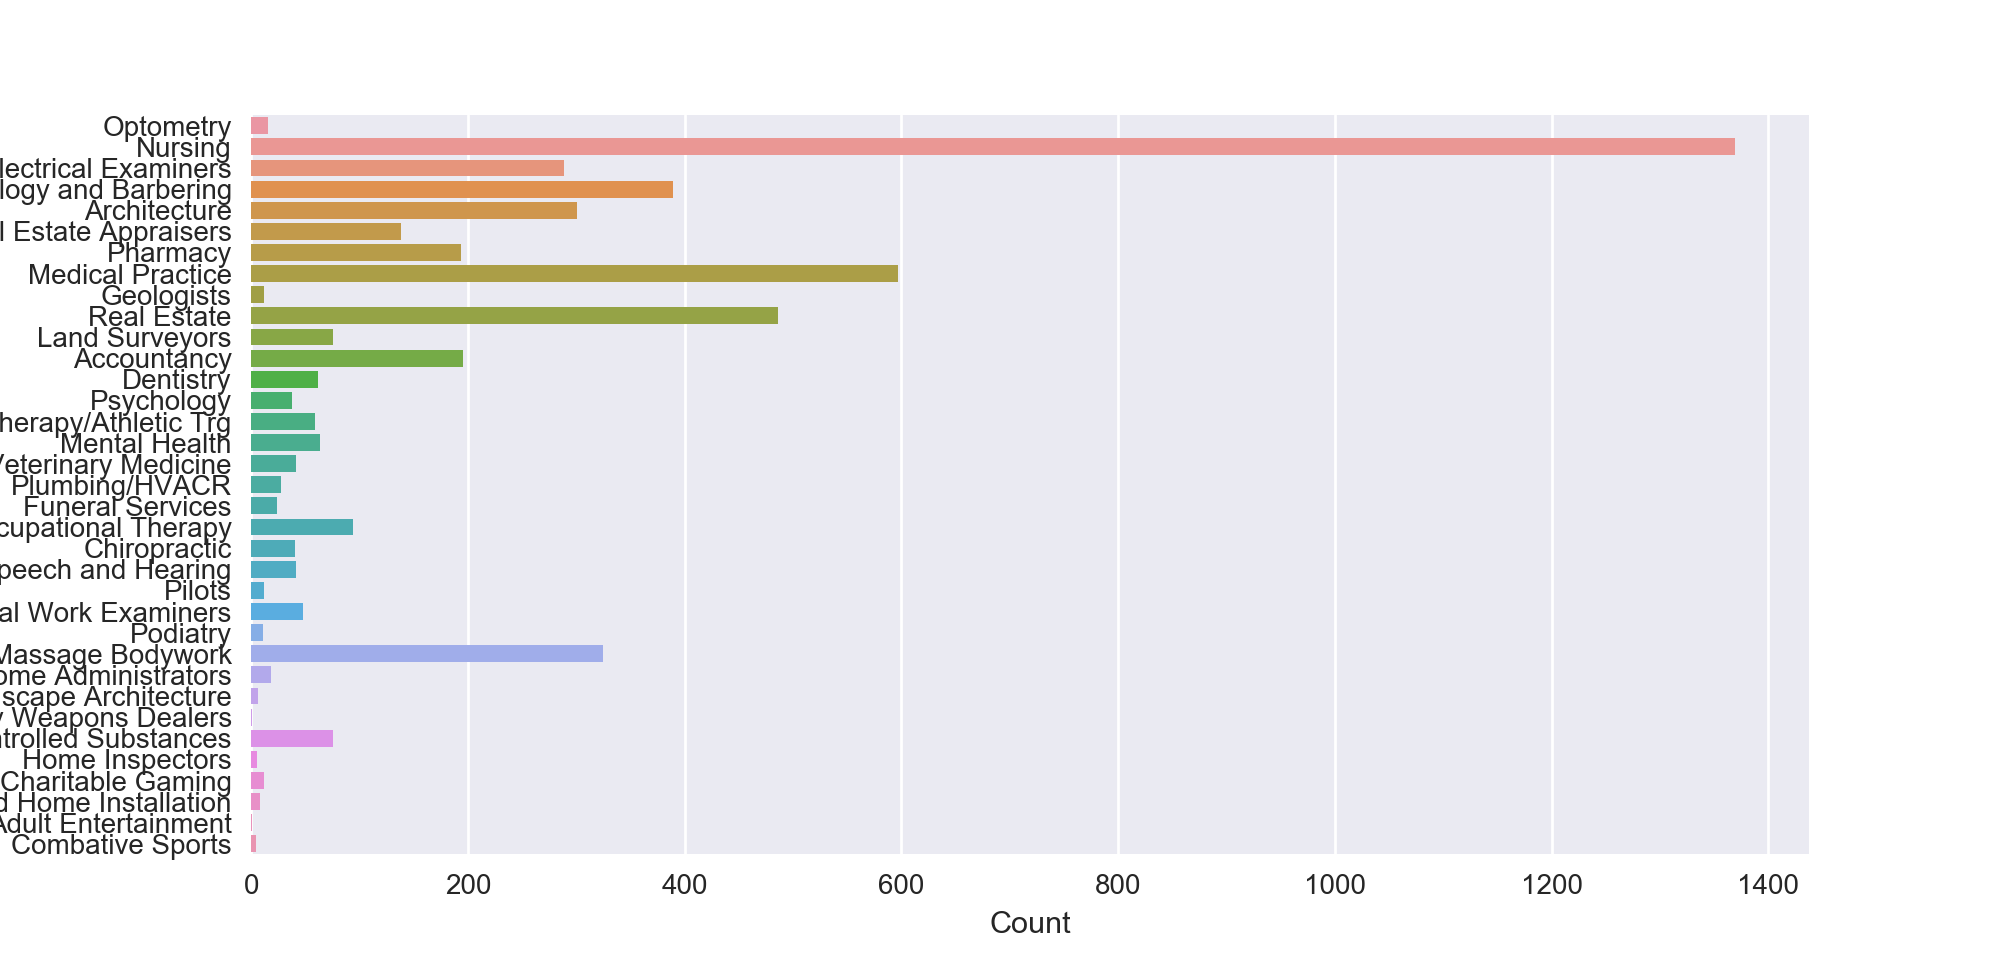

In [35]:
p = sns.barplot(y=Profession_df['Profession'],x=Profession_df['Count'])
#p.set_yticklabels(labels=Profession_df['Profession'],rotation=45);

Ok so it looks like **Nursing** has the highest number of fines, with **Medical Practice** coming in second. I guess this makes sense since those professions deal with peoples lives and are probably more scrutinized?

So we believe we have answered all the questions we set out to answer. We ofcourse came up with some other questions along the way, hopefully one of you feel like tackling these question.

One final question is, throughout the analysis, we see repeat offenses/fines which seem to be given on the same day, are these errors in the data entry process or are multiple offenses normal? If these are errors in the data, then how does this affect all the analysis conducted thus far?